In [1]:
# Data Processing
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [3]:
# Load and look Austin Housing Data
df = pd.read_csv('0_Data/austinHousingData.csv')
df.head()

zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
0             1.98             2            True        True       True   
1             1.98             2            True        True       True   
2             1.98             0            True        True      False   
3             1.98             2            True        True       True   
4             1.98             0            True        True      False   

   hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
0        True   False    False  Single Family              2       2012   
1        True   False    False  Single Family              2       2013   
2        True   False    False  Single Family              0       2018   
3        True   False    False  Single Family              2       2013   
4        True   False    False  Single Family              0       2002   

   latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
0     305000.0                5      2019-09-02                 9   
1     295000.0                1      2020-10-13                10   
2     256125.0                1      2019-07-31                 7   
3     240000.0                4      2018-08-08                 8   
4     239900.0                3      2018-10-31                10   

   latest_saleyear                                latestPriceSource  \
0             2019  Coldwell Banker United, Realtors - South Austin   
1             2020                                   Agent Provided   
2             2019                                   Agent Provided   
3             2018                                   Agent Provided   
4             2018                                   Agent Provided   

   numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
0           39                           0                5   
1           29                           0                1   
2            2                           0                4   
3            9                           0                0   
4           27                           0                0   

   numOfParkingFeatures  numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
0                     2                           1                      3   
1                     2                           0                      0   
2                     1                           0                      1   
3                     2                           0                      0   
4                     1                           0                      0   

   numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
0                        0                    1                       0   
1                        0                    0                       0   
2                        0                    0                       0   
3                        0                    0                       0   
4                        0                    0                       0   

   lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0       6011.0          2601.0         

In [4]:
df.zpid.duplicated().sum()

0

In [5]:
# Check Data Types
df.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [6]:
# Check Data Shape
df.shape

(15171, 47)

In [7]:
# Checking Duplicate Data
df[df.duplicated(subset=['latitude','longitude'], keep=False)].sort_values('latitude')

Empty DataFrame
Columns: [zpid, city, streetAddress, zipcode, description, latitude, longitude, propertyTaxRate, garageSpaces, hasAssociation, hasCooling, hasGarage, hasHeating, hasSpa, hasView, homeType, parkingSpaces, yearBuilt, latestPrice, numPriceChanges, latest_saledate, latest_salemonth, latest_saleyear, latestPriceSource, numOfPhotos, numOfAccessibilityFeatures, numOfAppliances, numOfParkingFeatures, numOfPatioAndPorchFeatures, numOfSecurityFeatures, numOfWaterfrontFeatures, numOfWindowFeatures, numOfCommunityFeatures, lotSizeSqFt, livingAreaSqFt, numOfPrimarySchools, numOfElementarySchools, numOfMiddleSchools, numOfHighSchools, avgSchoolDistance, avgSchoolRating, avgSchoolSize, MedianStudentsPerTeacher, numOfBathrooms, numOfBedrooms, numOfStories, homeImage]
Index: []

In [8]:
# Check Missing Data
df.isna().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [9]:
df['latest_saledate'].min()


'2018-01-22'

In [10]:
df['latest_saledate'].max()

'2021-01-30'

# Checking Home Type
## Since Single Family(94%), Condo(3%) and Townhouse(1%) making up most of data, remove all other home type

In [11]:
# Checking Home Type
df['homeType'].value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [12]:
df['homeType'].value_counts(normalize=True)

Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Residential              0.002439
Apartment                0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: homeType, dtype: float64

In [13]:
df = df.loc[((df['homeType'] == 'Single Family') | (df['homeType'] == 'Condo')) | (df['homeType'] == 'Townhouse')]
df['homeType'].value_counts()

Single Family    14241
Condo              470
Townhouse          174
Name: homeType, dtype: int64

# Checking Outlier

In [14]:
df.describe()

zpid       zipcode      latitude     longitude  \
count  1.488500e+04  14885.000000  14885.000000  14885.000000   
mean   1.043226e+08  78736.002889     30.291861    -97.778845   
std    3.170740e+08     18.878188      0.097289      0.084900   
min    2.858495e+07  78617.000000     30.085030    -98.022057   
25%    2.941135e+07  78727.000000     30.202938    -97.838699   
50%    2.949520e+07  78739.000000     30.285215    -97.769783   
75%    7.033872e+07  78749.000000     30.367332    -97.718246   
max    2.146313e+09  78759.000000     30.517174    -97.569504   

       propertyTaxRate  garageSpaces  parkingSpaces     yearBuilt  \
count     14885.000000  14885.000000   14885.000000  14885.000000   
mean          1.994189      1.228015       1.227410   1988.720188   
std           0.053282      1.342014       1.342142     21.502760   
min           1.980000      0.000000       0.000000   1905.000000   
25%           1.980000      0.000000       0.000000   1975.000000   
50%           1.980000      1.000000       1.000000   1993.000000   
75%           1.980000      2.000000       2.000000   2006.000000   
max           2.210000     22.000000      22.000000   2020.000000   

        latestPrice  numPriceChanges  latest_salemonth  latest_saleyear  \
count  1.488500e+04     14885.000000      14885.000000     14885.000000   
mean   5.118313e+05         3.032986          6.722808      2019.077125   
std    4.413477e+05         2.481655          3.137753         0.813562   
min    5.500000e+03         1.000000          1.000000      2018.000000   
25%    3.090000e+05         1.000000          4.000000      2018.000000   
50%    4.050000e+05         2.000000          7.000000      2019.000000   
75%    5.750000e+05         4.000000          9.000000      2020.000000   
max    1.350000e+07        23.000000         12.000000      2021.000000   

        numOfPhotos  numOfAccessibilityFeatures  numOfAppliances  \
count  14885.000000                14885.000000     14885.000000   
mean      30.830433                    0.013235         3.490359   
std       21.184201                    0.181144         1.868598   
min        1.000000                    0.000000         0.000000   
25%       20.000000                    0.000000         2.000000   
50%       29.000000                    0.000000         3.000000   
75%       39.000000                    0.000000         4.000000   
max      179.000000                    8.000000        10.000000   

       numOfParkingFeatures  numOfPatioAndPorchFeatures  \
count          14885.000000                14885.000000   
mean               1.709842                    0.667854   
std                0.778982                    0.983397   
min                0.000000                    0.000000   
25%                1.000000                    0.000000   
50%                2.000000                    0.000000   
75%                2.000000                    1.000000   
max                6.000000                    8.000000   

       numOfSecurityFeatures  numOfWaterfrontFeatures  numOfWindowFeatures  \
count           14885.000000             14885.000000         14885.000000   
mean                0.472556                 0.002620             0.210749   
std                 0.828560                 0.059615             0.490701   
min                 0.000000                 0.000000             0.000000   
25%                 0.000000                 0.000000             0.000000   
50%                 0.000000                 0.000000             0.000000   
75%                 1.000000                 0.000000             0.000000   
max                 6.000000                 2.000000             4.000000   

       numOfCommunityFeatures   lotSizeSqFt  livingAreaSqFt  \
count            14885.000000  1.488500e+04    14885.000000   
mean                 0.011757  1.207959e+05     2205.469735   
std                  0.113856  1.236986e+07     1367.932682   
min                  0.000000  

# Possible Outliers in lastestPrice, lotSizeSqFt, livingAreaSqFt and numOfBathrooms

In [15]:
# Checking lotSizeSqFt outliers
df.sort_values('lotSizeSqFt', ascending=False).head(5)

zpid    city          streetAddress  zipcode  \
14654   58297775  austin         3200 W 35th St    78703   
9244    62605548  austin  706 W 22nd St APT 306    78705   
11116  145652991  austin       4319 Nitschke St    78723   
2340   124837778  austin    4304 Front Range Ln    78732   
4635   202157510  austin     201 Charismatic Pl    78737   

                                             description   latitude  \
14654  Fabulous 4 Bed 4 Bath house on one of the larg...  30.314316   
9244   Leased for $1695 though 7/31/2020 - Unique gat...  30.285631   
11116  **Subject to City of Austin SMART Housing and ...  30.294910   
2340   4304 Front Range Ln, Austin, TX 78732 is a sin...  30.380476   
4635   201 Charismatic Pl, Austin, TX 78737 is a sing...  30.205276   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
14654 -97.768044             1.98             5           False        True   
9244  -97.745697             1.98             0            True        True   
11116 -97.698997             1.98             1            True        True   
2340  -97.881027             1.98             2            True        True   
4635  -98.011406             2.01             3            True        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
14654       True        True   False    False  Single Family              5   
9244       False        True   False    False          Condo              0   
11116       True        True   False    False      Townhouse              1   
2340        True        True   False     True  Single Family              2   
4635        True        True    True    False  Single Family              3   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
14654       1955    1650000.0                3      2020-02-20   
9244        1982     179900.0                7      2019-10-15   
11116       2016     187471.0                1      2020-06-29   
2340        2014     569000.0                1      2019-03-29   
4635        2015     999500.0                3      2019-11-08   

       latest_salemonth  latest_saleyear latestPriceSource  numOfPhotos  \
14654                 2             2020   Broker Provided           23   
9244                 10             2019    Agent Provided           16   
11116                 6             2020    Agent Provided           26   
2340                  3             2019    Agent Provided           33   
4635                 11             2019   Broker Provided            1   

       numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
14654                           0                8                     2   
9244                            0                4                     0   
11116                           0                3                     2   
2340                            0                4                     2   
4635                            0                4                     2   

       numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
14654                           2                      1   
9244                            0                      0   
11116                           0                      1   
2340                            0                      0   
4635                            0                      0   

       numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
14654                        0                    0                       0   
9244                         0                    0                       0   
11116                        0                    1                       0   
2340                         0                    0                       0   
4635                         0                    0                       0   

        lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  \
14654  1.508483e+09          3328.0                    1   
9244   3.4154

In [16]:
# Checking livingAreaSqFt outliers
df.sort_values('livingAreaSqFt', ascending=True).head(5)

zpid    city             streetAddress  zipcode  \
1170    94641643  austin    3003 Brass Buttons Trl    78734   
3518    29420819  austin           404 Primrose St    78753   
13314   29330022  austin  1405 Hartford Rd APT 202    78703   
9213   145658912  austin    1011 W 23rd St APT 103    78705   
10118   29385318  austin            2202 E 10th St    78702   

                                             description   latitude  \
1170   Lake Austin Waterfront lot in Apache Shores! O...  30.381195   
3518   404 Primrose St, Austin, TX 78753 is a single ...  30.350330   
13314  Old West Austin Efficiency. Close to metro/UT ...  30.284014   
9213   Very desirable location for UT students only 5...  30.287077   
10118  Great opportunity to build on your lot in high...  30.264668   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
1170  -97.915985             1.98             0            True        True   
3518  -97.697739             1.98             0           False       False   
13314 -97.762421             1.98             0            True        True   
9213  -97.748085             1.98             1            True        True   
10118 -97.717590             1.98             2            True        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
1170       False        True   False    False  Single Family              0   
3518       False       False   False    False  Single Family              0   
13314      False        True   False    False          Condo              0   
9213        True        True   False     True          Condo              1   
10118       True        True   False     True          Condo              2   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
1170        2012     850000.0                4      2018-07-21   
3518        1945     139000.0                1      2019-07-02   
13314       1972     175000.0                1      2019-10-01   
9213        1972     151500.0                5      2018-09-29   
10118       2019     499000.0                4      2019-10-22   

       latest_salemonth  latest_saleyear latestPriceSource  numOfPhotos  \
1170                  7             2018    Agent Provided           49   
3518                  7             2019   Broker Provided            1   
13314                10             2019    Agent Provided           16   
9213                  9             2018    Agent Provided            1   
10118                10             2019   Broker Provided           29   

       numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
1170                            0                1                     0   
3518                            0                0                     0   
13314                           0                3                     0   
9213                            0                5                     2   
10118                           0                3                     2   

       numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
1170                            0                      0   
3518                            0                      0   
13314                           1                      1   
9213                            0                      0   
10118                           0                      1   

       numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
1170                         0                    0                       0   
3518                         0                    0                       0   
13314                        0                    1                       0   
9213                         0                    0                       0   
10118                        0                    0                       0   

       lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  \
1170       23522.4           300.0                    1 

In [17]:
# Checking livingAreaSqFt outliers
df.sort_values('livingAreaSqFt', ascending=False).head(5)

zpid    city            streetAddress  zipcode  \
705    70330356  austin            201 Marly Way    78733   
2557   64523076  austin           9704 Saugus Ln    78733   
2316  125904370  austin           12400 Cedar St    78732   
5328   29327226  austin     3509 Lost Creek Blvd    78735   
375    89551873  austin  14800 Flat Top Ranch Rd    78732   

                                            description   latitude  longitude  \
705   Level building site with great canyon views an...  30.323517 -97.861473   
2557  New Construction, EANES Schools, 4bed 3 bath, ...  30.345898 -97.859985   
2316  12400 Cedar Street - Villa Del Lago is a uniqu...  30.392859 -97.877609   
5328  *$6,762,377 is Tax Value - Set in exclusive Ba...  30.272158 -97.856033   
375   GRACIOUS LUXURY ON LAKE AUSTIN\r\nThis award-w...  30.368996 -97.912720   

      propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
705              1.98             0            True        True      False   
2557             1.98             0            True        True      False   
2316             1.98             5           False        True       True   
5328             1.98             7            True        True       True   
375              1.98             6            True        True       True   

      hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
705         True   False    False  Single Family              0       2012   
2557        True   False    False  Single Family              0       2018   
2316        True   False     True  Single Family              5       2016   
5328        True    True    False  Single Family              7       2003   
375         True    True     True  Single Family              6       2014   

      latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
705      385000.0                2      2018-11-12                11   
2557     829000.0                1      2018-03-08                 3   
2316   13500000.0                2      2018-11-28                11   
5328    2700000.0                4      2018-05-20                 5   
375     4950000.0                6      2018-08-17                 8   

      latest_saleyear latestPriceSource  numOfPhotos  \
705              2018    Agent Provided            1   
2557             2018    Agent Provided            1   
2316             2018    Agent Provided           13   
5328             2018    Agent Provided           39   
375              2018    Agent Provided           34   

      numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
705                            0                0                     1   
2557                           0                1                     1   
2316                           0                0                     2   
5328                           0                5                     3   
375                            0                3                     2   

      numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
705                            0                      0   
2557                           0                      0   
2316                           0                      0   
5328                           0                      0   
375                            0                      0   

      numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
705                         0                    0                       0   
2557                        0                    0                       0   
2316                        0                    0                       0   
5328                        0                    0                       0   
375                         0                    0                       0   

      lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  \
705      109335.6        109292.0                    0   
2557     103237.2         29440.0                    0   


In [18]:
# Dropping Outliers
df.drop(index=[705, 2557], inplace=True)

In [19]:
# Checking numOfBathrooms
df.sort_values('numOfBathrooms', ascending=False).head(5)

zpid    city       streetAddress  zipcode  \
2838  111972888  austin  4212 Far West Blvd    78731   
2316  125904370  austin      12400 Cedar St    78732   
613    96645484  austin   9113 Camelback Dr    78733   
2547  119986580  austin       305 Marly Way    78733   
184   124843021  austin   13115 Perryton Dr    78732   

                                            description   latitude  longitude  \
2838  Well-maintained home in highly desirable North...  30.361406 -97.769707   
2316  12400 Cedar Street - Villa Del Lago is a uniqu...  30.392859 -97.877609   
613   Sweeping views abound from this 10,802-square-...  30.331038 -97.855659   
2547  Open floor plan with ample light.  Unbelievabl...  30.324699 -97.861267   
184   This highly custom home sits on a well-establi...  30.338959 -97.926979   

      propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
2838             1.98             2           False        True       True   
2316             1.98             5           False        True       True   
613              1.98             3            True        True       True   
2547             1.98             4            True        True       True   
184              1.98             4            True        True       True   

      hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
2838        True   False    False  Single Family              2       1967   
2316        True   False     True  Single Family              5       2016   
613         True   False    False  Single Family              3       2007   
2547        True    True     True  Single Family              4       2014   
184         True    True     True  Single Family              4       2014   

      latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
2838     745000.0                1      2020-10-20                10   
2316   13500000.0                2      2018-11-28                11   
613     2750000.0                7      2018-05-02                 5   
2547    2795000.0                7      2019-03-07                 3   
184     4100000.0                3      2020-12-23                12   

      latest_saleyear latestPriceSource  numOfPhotos  \
2838             2020    Agent Provided           46   
2316             2018    Agent Provided           13   
613              2018    Agent Provided           40   
2547             2019   Broker Provided           38   
184              2020   Broker Provided          149   

      numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
2838                           0                4                     2   
2316                           0                0                     2   
613                            0                1                     3   
2547                           0                8                     2   
184                            0                8                     3   

      numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
2838                           0                      0   
2316                           0                      0   
613                            0                      0   
2547                           0                      0   
184                            0                      0   

      numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
2838                        0                    0                       0   
2316                        0                    0                       0   
613                         0                    0                       0   
2547                        0                    0                       0   
184                         0                    0                       0   

      lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  \
2838      10236.0          2137.0                    1   
2316     710899.2         15394.0                    1   
613       43560.0         1061

In [20]:
# First property number of Bathrooms data is typo based on zillow report (https://www.zillow.com/homedetails/4212-Far-West-Blvd-Austin-TX-78731/111972888_zpid/)
# Correcting 27 bathroom to 3 bathroom
df.loc[df.index==2838, 'numOfBathrooms'] = 3.0

In [21]:
df.sort_values('numOfBathrooms', ascending=True).head(5)

zpid    city         streetAddress  zipcode  \
14357   29335803  austin        2709 Townes Ln    78703   
1842    94642666  austin  10640 Senna Hills Dr    78733   
4491   114157301  austin          348 Drury Ln    78737   
4464    63596867  austin      200 Lexington Dr    78737   
6646    29503854  austin     8604 Oak Ledge Dr    78748   

                                             description   latitude  \
14357  Remodeled Tarry Town Jewel, Grand entry highli...  30.298880   
1842   Wow! Reduced! First time on the market! Move i...  30.312716   
4491   348 Drury Ln, Austin, TX 78737 is a single fam...  30.200550   
4464   200 Lexington Dr, Austin, TX 78737 is a single...  30.199942   
6646   8604 Oak Ledge Dr, Austin, TX 78748 is a singl...  30.188589   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
14357 -97.767937             1.98             2           False        True   
1842  -97.900482             1.98             2            True        True   
4491  -97.969345             2.01             3            True        True   
4464  -97.984703             2.01             0            True        True   
6646  -97.823662             1.98             0           False        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
14357       True        True   False     True  Single Family              2   
1842        True        True   False     True  Single Family              2   
4491        True        True   False     True  Single Family              3   
4464       False        True   False    False  Single Family              0   
6646       False        True   False    False  Single Family              0   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
14357       1953     800000.0               12      2020-06-29   
1842        2011     895000.0                5      2020-06-24   
4491        2011     342400.0               10      2019-01-14   
4464        2004     409900.0                2      2020-07-06   
6646        1971     450000.0                1      2019-08-07   

       latest_salemonth  latest_saleyear latestPriceSource  numOfPhotos  \
14357                 6             2020   Broker Provided           74   
1842                  6             2020    Agent Provided           35   
4491                  1             2019     Public Record            5   
4464                  7             2020    Agent Provided            9   
6646                  8             2019   Broker Provided            1   

       numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
14357                           0                1                     3   
1842                            0                3                     2   
4491                            0                5                     4   
4464                            0                0                     1   
6646                            0                4                     2   

       numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
14357                           2                      1   
1842                            0                      0   
4491                            0                      0   
4464                            0                      0   
6646                            2                      0   

       numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
14357                        0                    2                       0   
1842                         0                    0                       0   
4491                         0                    0                       1   
4464                         0                    0                       0   
6646                         0                    2                       0   

       lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  \
14357       8232.0          3779.0                    1   
1842       12196.8   

In [22]:
# Some list has 0 Bathrooms and 0 Bedrooms which does not sound right.
# Inputting typical bathroom count per bedroom count based on year builit then drop any listing with 0 Bathrooms and 0 Bedrooms
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>0) & (df['yearBuilt'] > 1989), 'numOfBathrooms'] = 2
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>0) & (df['yearBuilt'] <= 1989), 'numOfBathrooms'] = 1
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>=3) & (df['yearBuilt'] > 1989), 'numOfBathrooms'] = 2.5
df.loc[(df['numOfBathrooms']==0) & (df['numOfBedrooms']>=3) & (df['yearBuilt'] <= 1989), 'numOfBathrooms'] = 2

df.drop(df[df['numOfBathrooms']==0].index, inplace=True)
df.drop(df[df['numOfBedrooms']==0].index, inplace=True)

In [23]:
# Checking numOfBedrooms
df.sort_values('numOfBedrooms', ascending=False).head(5)

zpid    city         streetAddress  zipcode  \
8597   2094498207  austin  4902 Duval Rd R2 #R2    78727   
8531     58306332  austin     3906 Hawkshead Dr    78727   
14435    29401385  austin   4302 Avenue G APT C    78751   
2547    119986580  austin         305 Marly Way    78733   
9314     29384319  austin         1310 E 2nd St    78702   

                                             description   latitude  \
8597   Lovely convenient condo, with a private wooded...  30.415489   
8531   Enjoy this home across from The Domain! Comple...  30.416149   
14435  Charming 3-unit multifamily property built by ...  30.305981   
2547   Open floor plan with ample light.  Unbelievabl...  30.324699   
9314   Contact owner for showing, day before advance ...  30.260422   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
8597  -97.737213             1.98             0            True        True   
8531  -97.722801             1.98             2           False        True   
14435 -97.728012             1.98             0           False       False   
2547  -97.861267             1.98             4            True        True   
9314  -97.730194             1.98             2           False        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
8597       False        True   False     True          Condo              0   
8531        True        True   False    False  Single Family              2   
14435      False        True   False    False  Single Family              0   
2547        True        True    True     True  Single Family              4   
9314        True        True   False     True  Single Family              2   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
8597        1985     174900.0                2      2020-11-13   
8531        2006     650000.0                1      2020-08-05   
14435       1925     750000.0                1      2018-04-27   
2547        2014    2795000.0                7      2019-03-07   
9314        1915     599995.0                7      2020-03-17   

       latest_salemonth  latest_saleyear latestPriceSource  numOfPhotos  \
8597                 11             2020    Agent Provided           25   
8531                  8             2020    Agent Provided           36   
14435                 4             2018    Agent Provided           15   
2547                  3             2019   Broker Provided           38   
9314                  3             2020    Agent Provided            1   

       numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
8597                            0                4                     1   
8531                            0                2                     2   
14435                           0                0                     1   
2547                            0                8                     2   
9314                            0                3                     3   

       numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
8597                            0                      0   
8531                            2                      3   
14435                           0                      0   
2547                            0                      0   
9314                            0                      0   

       numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  \
8597                         0                    0                       0   
8531                         0                    1                       0   
14435                        0                    0                       0   
2547                         0                    0                       0   
9314                         0                    0                       0   

       lotSizeSqFt  livingAreaSqFt  numOfPrimarySchools  \
8597        5227.0           916.0                    1   
8531        9191

In [24]:
# First list should have 2 Bedrooms not 20 (https://www.zillow.com/homedetails/4902-Duval-Rd-APT-R2-Austin-TX-78727/63836867_zpid/)
df.loc[df.index==8597, 'numOfBedrooms'] = 2

In [25]:
# Checking garageSpaces
df.sort_values('garageSpaces', ascending=False).head(10)

zpid    city             streetAddress  zipcode  \
6885   145656156  austin       705 Mc Queen St #34    78745   
4533    28587235  austin  13100 Rooster Springs Rd    78737   
6805    29502805  austin        7600 Elm Forest Rd    78745   
11108   29409917  austin         1405 Berkshire Dr    78723   
6985    29494837  austin        6907 Cherrydale Dr    78745   
9240    29396074  austin              908 Keith Ln    78705   
4777    29331364  austin    3301 Barton Creek Blvd    78735   
9201    29445509  austin              13712 Ann Pl    78728   
6230    29327172  austin   1814 Randolph Ridge Trl    78746   
15164  125807167  austin               8707 Leo St    78745   

                                             description   latitude  \
6885   Beautiful 2-story home located in highly sough...  30.189331   
4533   Enjoy country living with the convenience of t...  30.204746   
6805   Gorgeous 3/2 home owner remodel on almost 2/3 ...  30.190971   
11108  Beautifully renovated single story mid-century...  30.317060   
6985   Beautifully remodeled home in HOT 78745!! This...  30.200857   
9240   Keith Lane is has our homes strategically plac...  30.291706   
4777   Privately gated Barton Creek estate on 1.58 Ac...  30.283585   
9201   13712 Ann Pl, Austin, TX 78728 is a single fam...  30.427391   
6230   Stunning  home in Eanes, minutes  from downtow...  30.272011   
15164  Brand new construction.  High end home that si...  30.189131   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
6885  -97.792809             1.98            22            True        True   
4533  -97.991356             2.01            20           False        True   
6805  -97.800804             1.98            12           False        True   
11108 -97.697220             1.98            12           False        True   
6985  -97.803902             1.98            12           False        True   
9240  -97.725502             1.98            12           False        True   
4777  -97.875526             1.98            12            True        True   
9201  -97.675156             1.98            10           False        True   
6230  -97.821548             1.98            10            True        True   
15164 -97.825455             1.98            10           False        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
6885        True        True   False     True          Condo             22   
4533        True        True   False     True  Single Family             20   
6805        True        True   False    False  Single Family             12   
11108       True        True   False     True  Single Family             12   
6985        True        True   False     True  Single Family             12   
9240        True        True   False    False  Single Family             12   
4777        True        True    True    False  Single Family             12   
9201        True        True   False    False  Single Family             10   
6230        True        True    True     True  Single Family             10   
15164       True        True    True    False  Single Family             10   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
6885        2016     399000.0                1      2020-11-15   
4533        2018     824900.0                2      2018-03-08   
6805        1960     525000.0                7      2019-08-19   
11108       1955     500000.0                2      2020-11-10   
6985        1972     328000.0                3      2020-12-28   
9240        2003    3400000.0                1      2020-04-01   
4777        1991    1595000.0               15      2020-12-04   
9201        1979     279900.0                7      2020-10-30   
6230        1999    1850000.0                5      2018-09-13   
15164       2020    1499000.0                5      2020-10-23   

       latest_salemonth  latest_saleyear            latestPriceSource

In [26]:
# Checking parkingSpaces
df.sort_values('parkingSpaces', ascending=False).head(10)

zpid    city             streetAddress  zipcode  \
6885   145656156  austin       705 Mc Queen St #34    78745   
4533    28587235  austin  13100 Rooster Springs Rd    78737   
9240    29396074  austin              908 Keith Ln    78705   
4777    29331364  austin    3301 Barton Creek Blvd    78735   
6985    29494837  austin        6907 Cherrydale Dr    78745   
11108   29409917  austin         1405 Berkshire Dr    78723   
6805    29502805  austin        7600 Elm Forest Rd    78745   
12081   83815578  austin            2300 Allred Dr    78748   
6230    29327172  austin   1814 Randolph Ridge Trl    78746   
9201    29445509  austin              13712 Ann Pl    78728   

                                             description   latitude  \
6885   Beautiful 2-story home located in highly sough...  30.189331   
4533   Enjoy country living with the convenience of t...  30.204746   
9240   Keith Lane is has our homes strategically plac...  30.291706   
4777   Privately gated Barton Creek estate on 1.58 Ac...  30.283585   
6985   Beautifully remodeled home in HOT 78745!! This...  30.200857   
11108  Beautifully renovated single story mid-century...  30.317060   
6805   Gorgeous 3/2 home owner remodel on almost 2/3 ...  30.190971   
12081  Rare opportunity to own 2700 sq.ft. of worksho...  30.172871   
6230   Stunning  home in Eanes, minutes  from downtow...  30.272011   
9201   13712 Ann Pl, Austin, TX 78728 is a single fam...  30.427391   

       longitude  propertyTaxRate  garageSpaces  hasAssociation  hasCooling  \
6885  -97.792809             1.98            22            True        True   
4533  -97.991356             2.01            20           False        True   
9240  -97.725502             1.98            12           False        True   
4777  -97.875526             1.98            12            True        True   
6985  -97.803902             1.98            12           False        True   
11108 -97.697220             1.98            12           False        True   
6805  -97.800804             1.98            12           False        True   
12081 -97.829330             1.98            10           False        True   
6230  -97.821548             1.98            10            True        True   
9201  -97.675156             1.98            10           False        True   

       hasGarage  hasHeating  hasSpa  hasView       homeType  parkingSpaces  \
6885        True        True   False     True          Condo             22   
4533        True        True   False     True  Single Family             20   
9240        True        True   False    False  Single Family             12   
4777        True        True    True    False  Single Family             12   
6985        True        True   False     True  Single Family             12   
11108       True        True   False     True  Single Family             12   
6805        True        True   False    False  Single Family             12   
12081       True        True   False    False  Single Family             10   
6230        True        True    True     True  Single Family             10   
9201        True        True   False    False  Single Family             10   

       yearBuilt  latestPrice  numPriceChanges latest_saledate  \
6885        2016     399000.0                1      2020-11-15   
4533        2018     824900.0                2      2018-03-08   
9240        2003    3400000.0                1      2020-04-01   
4777        1991    1595000.0               15      2020-12-04   
6985        1972     328000.0                3      2020-12-28   
11108       1955     500000.0                2      2020-11-10   
6805        1960     525000.0                7      2019-08-19   
12081       2005     325000.0                1      2020-07-24   
6230        1999    1850000.0                5      2018-09-13   
9201        1979     279900.0                7      2020-10-30   

       latest_salemonth  latest_saleyear      latestPriceSource  numO

In [27]:
# Garage space and Parking Spaces are bogus numbers. Correcting those data based on homeTypes and latestPrice
df.loc[(df['garageSpaces'] > 3) & (df['latestPrice'] < 1000000) & (df['homeType'] == 'Single Family'), 'garageSpaces'] = 3
df.loc[(df['garageSpaces'] > 5) & (df['latestPrice'] > 1000000)& (df['homeType'] == 'Single Family'), 'garageSpaces'] = 4
df.loc[df.index==6885, 'garageSpaces'] = 2

In [28]:
df.loc[(df['parkingSpaces'] > 3) & (df['latestPrice'] < 1000000 & (df['homeType'] == 'Single Family')), 'parkingSpaces'] = 3
df.loc[(df['parkingSpaces'] > 5) & (df['latestPrice'] > 1000000& (df['homeType'] == 'Single Family')), 'parkingSpaces'] = 5
df.loc[df.index==6885, 'parkingSpaces'] = 2

In [29]:
# Checking city
df['city'].value_counts()

austin              14723
del valle              85
pflugerville           36
driftwood              12
manor                   5
dripping springs        4
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

In [30]:
# Change city name to austin
df.loc[df['city'] == 'del valle', 'city'] = 'austin'
df.loc[df['city'] == 'pflugerville', 'city'] = 'austin'
df.loc[df['city'] == 'driftwood', 'city'] = 'austin'
df.loc[df['city'] == 'manor', 'city'] = 'austin'
df.loc[df['city'] == 'manchaca', 'city'] = 'austin'
df.loc[df['city'] == 'west lake hills', 'city'] = 'austin'
df.loc[df['city'] == 'road', 'city'] = 'austin'
df.loc[df['city'] == 'dripping springs', 'city'] = 'austin'
df['city'].value_counts()

austin    14871
Name: city, dtype: int64

array([[<AxesSubplot:title={'center':'zpid'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'propertyTaxRate'}>,
        <AxesSubplot:title={'center':'garageSpaces'}>],
       [<AxesSubplot:title={'center':'parkingSpaces'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>,
        <AxesSubplot:title={'center':'latestPrice'}>,
        <AxesSubplot:title={'center':'numPriceChanges'}>,
        <AxesSubplot:title={'center':'latest_salemonth'}>,
        <AxesSubplot:title={'center':'latest_saleyear'}>],
       [<AxesSubplot:title={'center':'numOfPhotos'}>,
        <AxesSubplot:title={'center':'numOfAccessibilityFeatures'}>,
        <AxesSubplot:title={'center':'numOfAppliances'}>,
        <AxesSubplot:title={'center':'numOfParkingFeatures'}>,
        <AxesSubplot:title={'center':'numOfPatioAndPorchFeatures'}>,
        <AxesSubplot:title={'center

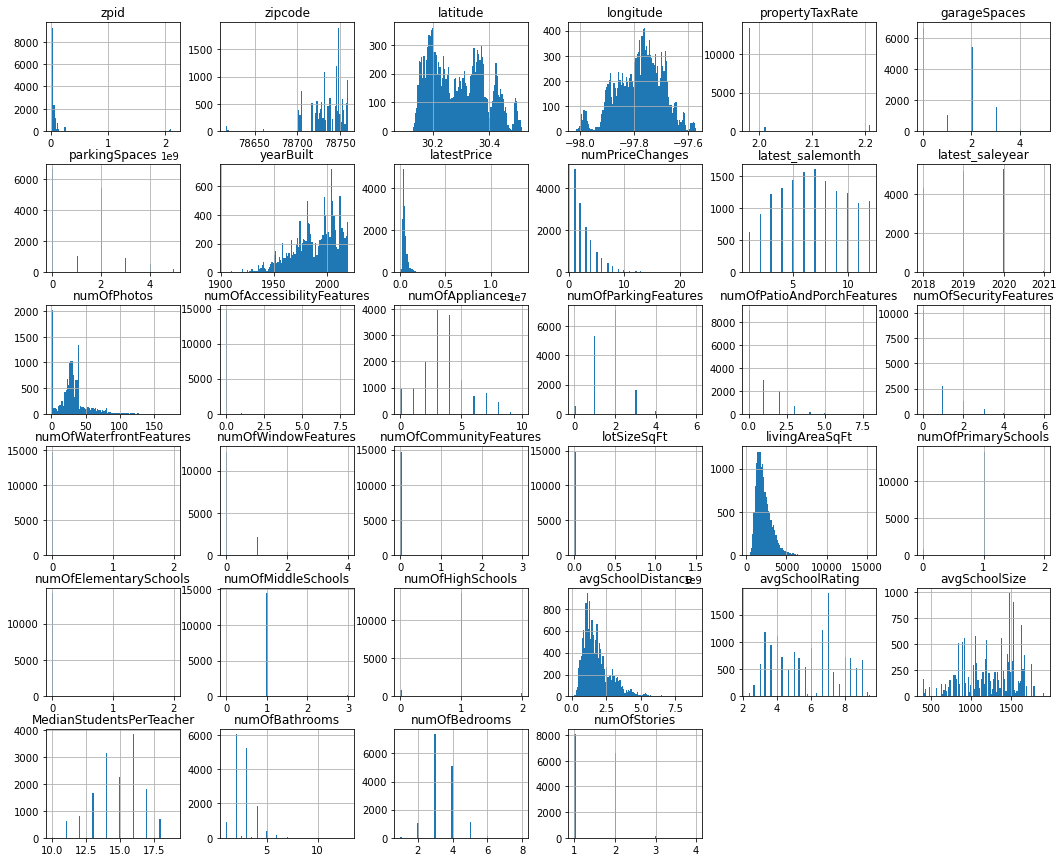

In [31]:
df.hist(figsize=(18,15), bins=100)

Extremly large houses and lots are under-represented in the dataset so we won't be able to reliably predict on them anyway so they are better left off.
Since we are unable to remove outliers using standard deviation, we will use IQR to remove the outliers.

In [32]:
def iqr_outliers(column):
    Q1, Q3 = np.percentile(column, [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5 * iqr)
    upper_range = Q3 + (1.5 * iqr)
    return lower_range, upper_range
    

In [33]:
# Determing our IQR for latestPrice, lot size, sq footage and longitude
lotlower,lotupper = iqr_outliers(df.lotSizeSqFt)
sqftlower, sqftupper = iqr_outliers(df.livingAreaSqFt)

# dropping the things outside of our lower and upper range
df.drop(df[ (df.lotSizeSqFt > lotupper) | (df.lotSizeSqFt < lotlower) ].index , inplace=True)
df.drop(df[ (df.livingAreaSqFt > sqftupper) | (df.livingAreaSqFt < sqftlower) ].index , inplace=True)

In [34]:
# Adjust condo and townhouse listings that are over-listed for lot size square feet into median lot size
df.loc[(df['homeType']=='Condo') | (df['homeType']=='Townhouse') & (df['livingAreaSqFt']<1200) & (df['lotSizeSqFt']>8000), 'lotSizeSqFt'] = df['lotSizeSqFt'].median()

array([[<AxesSubplot:title={'center':'zpid'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'propertyTaxRate'}>,
        <AxesSubplot:title={'center':'garageSpaces'}>],
       [<AxesSubplot:title={'center':'parkingSpaces'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>,
        <AxesSubplot:title={'center':'latestPrice'}>,
        <AxesSubplot:title={'center':'numPriceChanges'}>,
        <AxesSubplot:title={'center':'latest_salemonth'}>,
        <AxesSubplot:title={'center':'latest_saleyear'}>],
       [<AxesSubplot:title={'center':'numOfPhotos'}>,
        <AxesSubplot:title={'center':'numOfAccessibilityFeatures'}>,
        <AxesSubplot:title={'center':'numOfAppliances'}>,
        <AxesSubplot:title={'center':'numOfParkingFeatures'}>,
        <AxesSubplot:title={'center':'numOfPatioAndPorchFeatures'}>,
        <AxesSubplot:title={'center

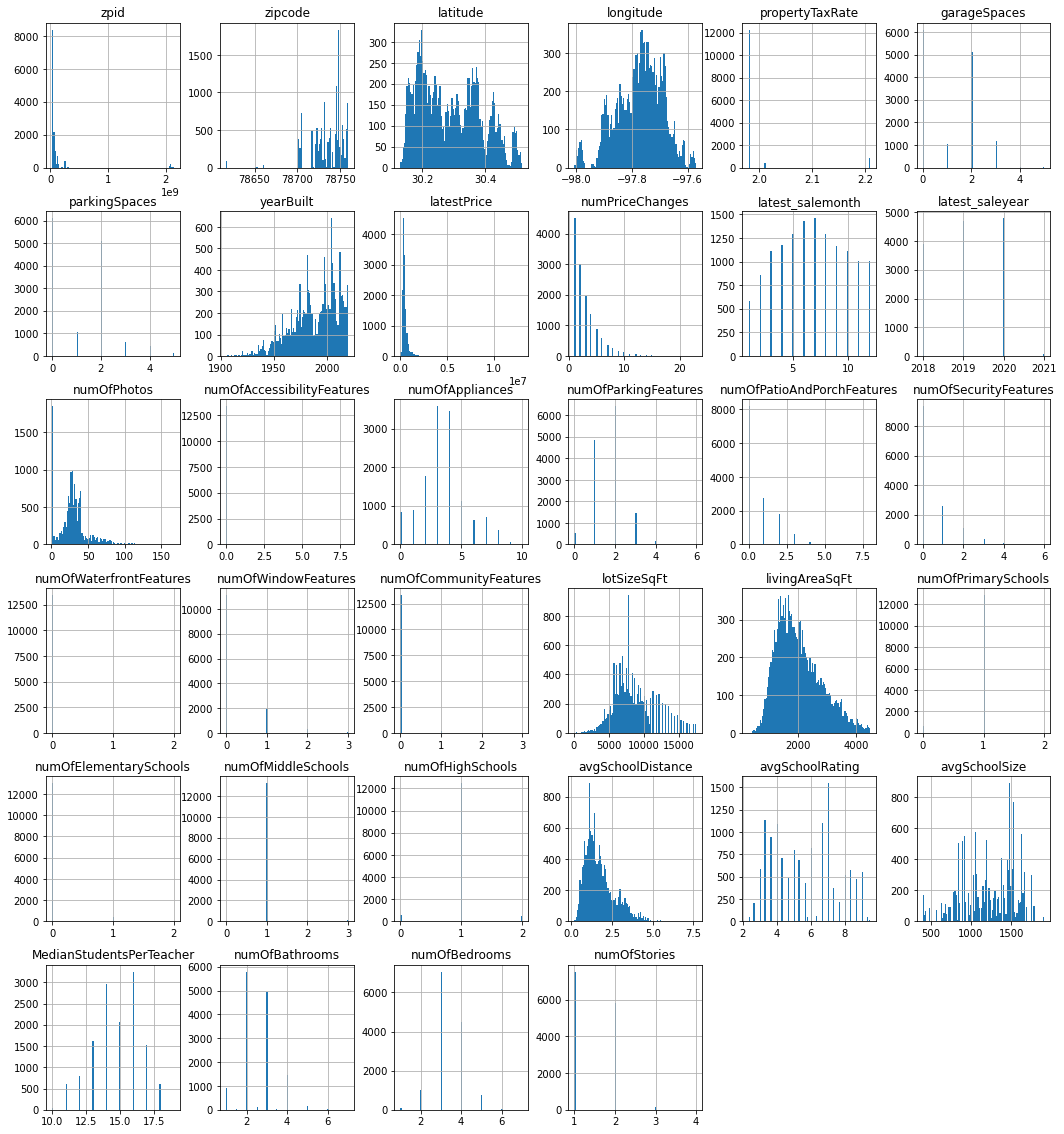

In [35]:
df.hist(figsize=(18,20), bins=100)

In [36]:
# we're using the median house value for a zip code to determine the zip code's sort, so we can visualize the zip code

# group our dataframe by zipcode on median home price, sorted ascending. 
zipsorted = pd.DataFrame(df.groupby('zipcode')['latestPrice'].median().sort_values(ascending=True))

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1

# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df['zip_rank'] = df['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

# apply the median home price per zip code to the data frame
df['median_zip'] = df['zipcode'].apply(lambda x: round(df.loc[df['zipcode']==x]['latestPrice'].median(), 0))

Text(0.5, 1.0, 'Price per Zip Code Median, by Zip Code Median Rank')

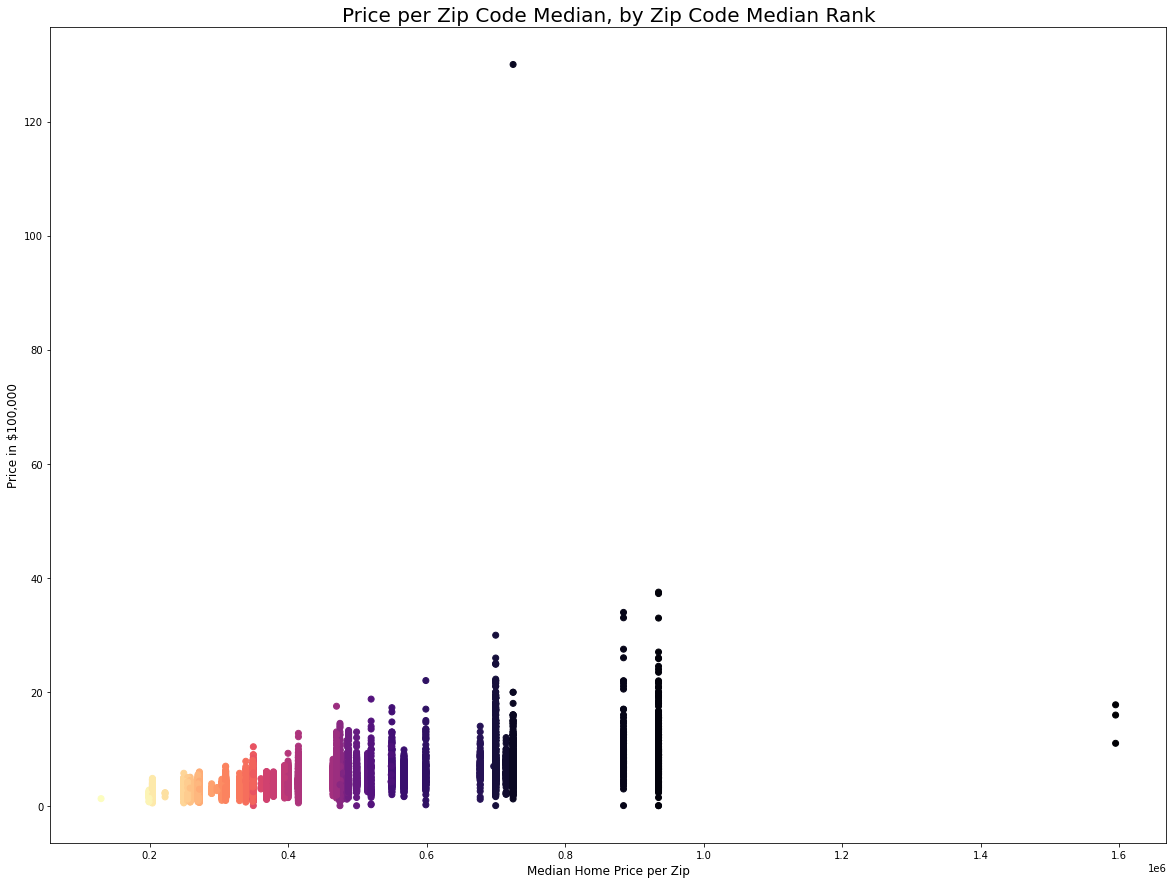

In [37]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['median_zip'], df['latestPrice'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Median Home Price per Zip', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Zip Code Median, by Zip Code Median Rank', fontsize=20)

We can see that a few of our zip codes are very high value. There are also some clear outliers in this data set. We'll take care of removing those, and then come back to this visual again later after we've done some cleanup.

Text(0.5, 1.0, 'Price per Total Square Feet, by Zip Code Median Rank')

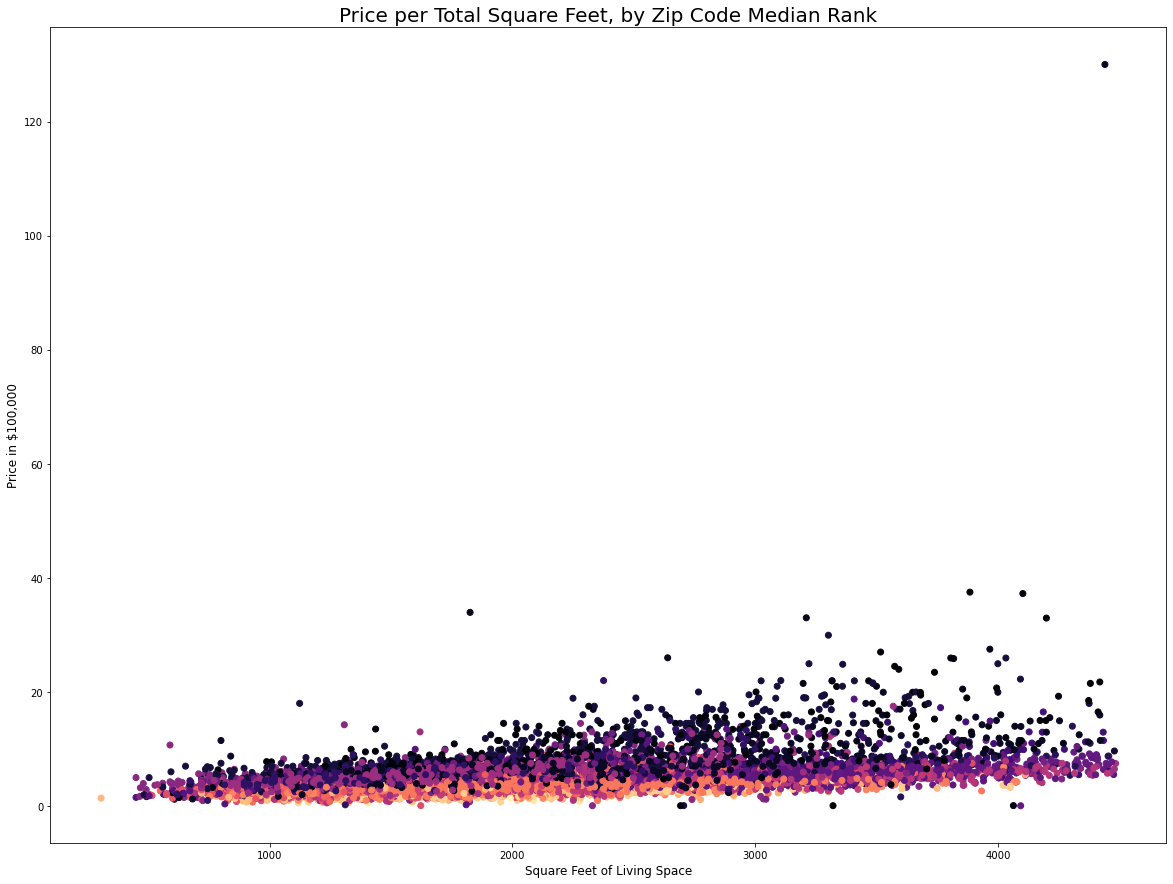

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['livingAreaSqFt'], df['latestPrice'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Feet, by Zip Code Median Rank', fontsize=20)

In [38]:
# we're dropping the values above 3 million, and the 3 entries from zipcode 78734
df.drop(df[df['latestPrice']>3000000].index, inplace=True)
df.drop(df[df['zipcode']==78734].index, inplace=True)

# check price stats by zip code and displaying top 30 zip codes by mean
find_zip_outliers = df.groupby('zipcode')['latestPrice'].describe()
find_zip_outliers.sort_values('mean', ascending=False).head(35)

count          mean            std       min       25%       50%  \
zipcode                                                                      
78703     262.0  1.015974e+06  494032.541175    6300.0  652250.0  925000.0   
78746     108.0  9.927278e+05  469048.102739    7900.0  699675.0  859500.0   
78704     667.0  8.367228e+05  445576.067740    7500.0  536250.0  699850.0   
78731     415.0  7.480795e+05  301562.570390  124000.0  554950.0  725000.0   
78738       1.0  6.970000e+05            NaN  697000.0  697000.0  697000.0   
78730     104.0  6.964075e+05  212757.726446  118499.0  566750.0  677500.0   
78756     133.0  6.803116e+05  332268.211346   21500.0  449900.0  599000.0   
78733     111.0  6.754273e+05  196141.027975  205000.0  549500.0  714900.0   
78701       7.0  6.395429e+05  252778.413221  415000.0  432450.0  549000.0   
78735     198.0  6.220068e+05  251482.177345  199900.0  481250.0  550000.0   
78705      59.0  5.990830e+05  390572.191023   23000.0  276500.0  520000.0   
78751     168.0  5.649131e+05  251580.281220  149900.0  388000.0  487450.0   
78750     272.0  5.574200e+05  145486.167183  165000.0  449000.0  567450.0   
78739     525.0  5.243970e+05  106746.452575  249900.0  449900.0  515000.0   
78732     459.0  5.207389e+05  159456.789357    5500.0  400000.0  499000.0   
78757     510.0  5.152024e+05  193463.218690  139999.0  399000.0  470000.0   
78702     379.0  5.141074e+05  216991.642138    6000.0  375000.0  475000.0   
78759     486.0  4.984297e+05  155565.398833  120000.0  395000.0  485000.0   
78722      93.0  4.924819e+05  142571.747486  250000.0  385000.0  475000.0   
78726     162.0  4.790106e+05   94657.006093  125000.0  425500.0  479450.0   
78737     391.0  4.746659e+05   99693.356596  179990.0  399945.0  465000.0   
78723     522.0  4.334465e+05  162790.896008   54900.0  339925.0  415000.0   
78717     491.0  4.229597e+05  117433.251762  147900.0  347638.5  400000.0   
78736     139.0  3.941405e+05   97790.381776  169997.0  329000.0  379000.0   
78749     757.0  3.919731e+05   82732.933602  139900.0  346000.0  395000.0   
78652       4.0  3.753398e+05   79883.093499  299500.0  321718.0  360929.5   
78741     210.0  3.686875e+05  151823.711181   86000.0  265000.0  349900.0   
78721     227.0  3.611402e+05  126006.588189    8000.0  289900.0  349900.0   
78727     379.0  3.597735e+05   90539.140023  114900.0  299450.0  369000.0   
78752     145.0  3.590740e+05  136425.941671   82900.0  265000.0  349900.0   
78745     981.0  3.549793e+05   89959.633895   81000.0  300000.0  349000.0   
78729     300.0  3.371235e+05   71946.215613   94900.0  290225.0  330000.0   
78758     380.0  3.356165e+05   99355.572852   69000.0  269900.0  339000.0   
78748    1082.0  3.158058e+05   75201.699800   97500.0  269900.0  309900.0   
78728     222.0  3.004068e+05   60126.327865   99950.0  275000.0  304450.0   

                75%        max  
zipcode                         
78703    1318750.00  2700000.0  
78746    1212250.00  2750000.0  
78704     999450.00  2995000.0  
78731     877000.00  1995000.0  
78738     697000.00   697000.0  
78730     800000.00  1400000.0  
78756     839000.00  2200000.0  
78733     799000.00  1200000.0  
78701     799450.00  1049000.0  
78735     675000.00  1725000.0  
78705     797000.00  1875000.0  
78751     696000.00  1324900.0  
78750     650000.00   985000.0  
78739     595000.00   925000.0  
78732     615000.00  1299000.0  
78757     599000.00  1750000.0  
78702     600000.00  1449900.0  
78759     593746.25  1150000.0  
78722     585000.00   899500.0  
78726     549800.00   714900.0  
78737     530000.00   819995.0  
78723     489675.00  1275000.0  
78717     495000.00   925000.0  
78736     478750.00   599900.0  
78749     439900.00   710000.0  
78652     414551.25   480000.0  
78741     429422.50   899990.0  
78721     429949.50   799000.0  
78727     419948.50   605000.0  
78752     424900.00  1040000.0  
78745     399000.00   799000.0  
78729     387875.00   575000.0  
7

In [39]:
# Anything under 75K is not legitimate market value sale, non-commercial or some unusal sales. We are dorpping.
df.drop(df.loc[(df['latestPrice'] <= 75000)].index, axis=0, inplace=True)

In [40]:
# Eliminating outliers on a per-zipcode basis using our IQR 1.5
zipcodes = df['zipcode'].unique()

for i in zipcodes:
    lower, upper = iqr_outliers(df[df['zipcode'] == i]['latestPrice'])
    df.drop(df[ ( (df.latestPrice > upper) & (df['zipcode'] == i) ) | ( (df.latestPrice < lower)  & (df['zipcode'] == i) ) ].index , inplace=True)

array([[<AxesSubplot:title={'center':'78617'}>,
        <AxesSubplot:title={'center':'78652'}>,
        <AxesSubplot:title={'center':'78653'}>,
        <AxesSubplot:title={'center':'78660'}>,
        <AxesSubplot:title={'center':'78701'}>,
        <AxesSubplot:title={'center':'78702'}>,
        <AxesSubplot:title={'center':'78703'}>],
       [<AxesSubplot:title={'center':'78704'}>,
        <AxesSubplot:title={'center':'78705'}>,
        <AxesSubplot:title={'center':'78717'}>,
        <AxesSubplot:title={'center':'78719'}>,
        <AxesSubplot:title={'center':'78721'}>,
        <AxesSubplot:title={'center':'78722'}>,
        <AxesSubplot:title={'center':'78723'}>],
       [<AxesSubplot:title={'center':'78724'}>,
        <AxesSubplot:title={'center':'78725'}>,
        <AxesSubplot:title={'center':'78726'}>,
        <AxesSubplot:title={'center':'78727'}>,
        <AxesSubplot:title={'center':'78728'}>,
        <AxesSubplot:title={'center':'78729'}>,
        <AxesSubplot:title={'center':'

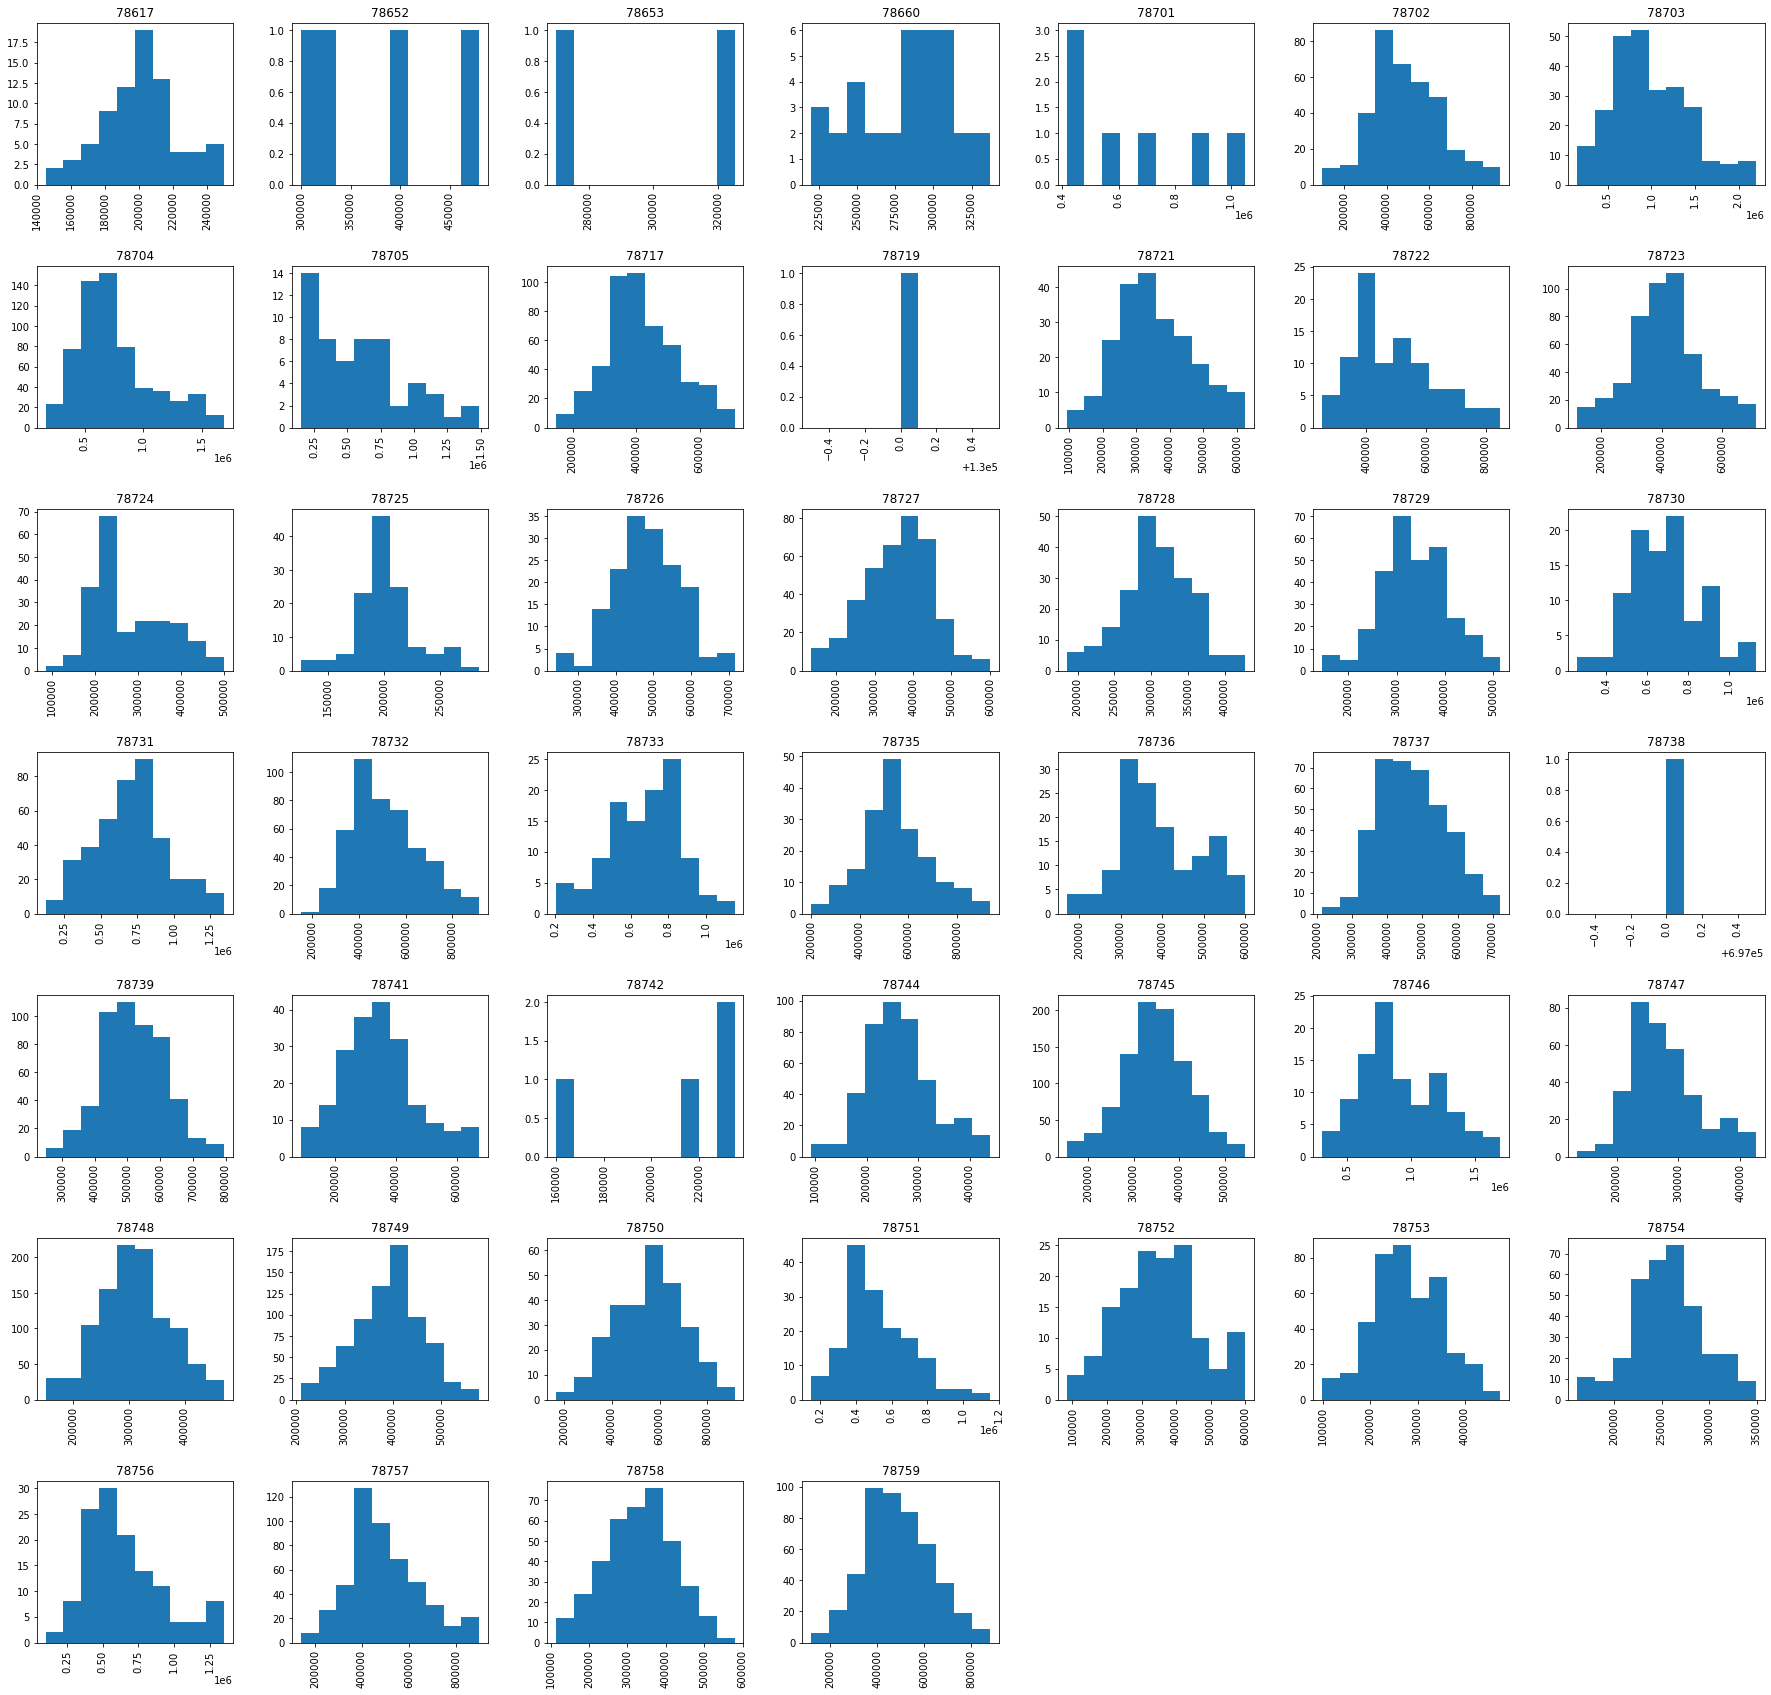

In [41]:
# Check price per zip
df['latestPrice'].hist(by=df['zipcode'], figsize=(30,30))

In [42]:
# Drop few zip codes where we have only a couple of data points
df.drop( df.loc[(df['zipcode']==78653) | (df['zipcode']==78738) | (df['zipcode']==78719)| (df['zipcode']==78652)| (df['zipcode']==78742)].index, axis=0, inplace=True)

In [43]:
# After removing removal redo zip code medians and ranking.

df['median_zip'] = df['zipcode'].apply(lambda x: round(df.loc[df['zipcode']==x]['latestPrice'].median(), 0))

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df.groupby('zipcode')['latestPrice'].median().sort_values(ascending=True))

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df['zip_rank'] = df['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

Text(0.5, 1.0, 'Price per Zip Code Median, by Zip Code Median Home Value')

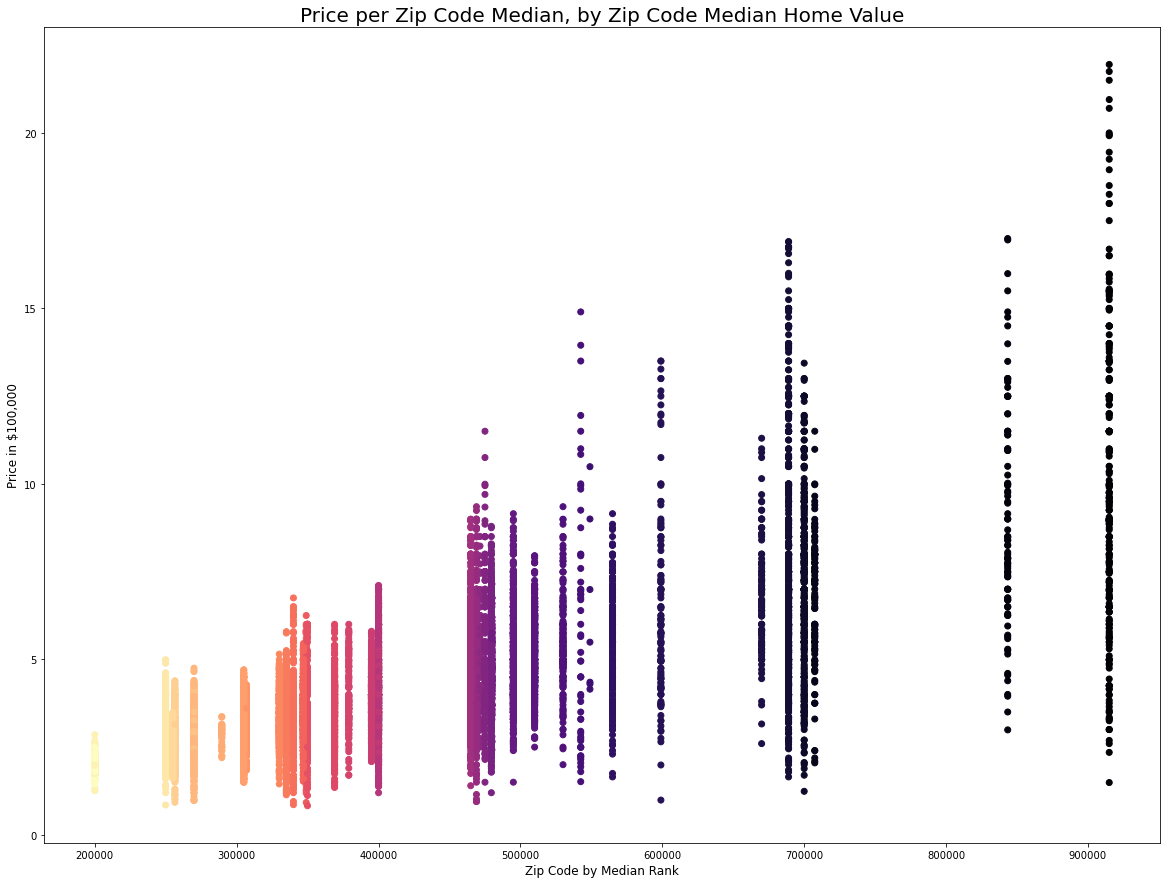

In [44]:
# Re-visualize zip code after outlier removal.
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['median_zip'], df['latestPrice'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Zip Code by Median Rank', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Zip Code Median, by Zip Code Median Home Value', fontsize=20)

In [45]:
# apply the median price per square foot per zip code to the data frame
df['pr_sqft'] = df.apply(lambda x: round( (x['latestPrice'] / x['livingAreaSqFt'] ), 0), axis=1 )

Text(0.5, 1.0, 'Price Per Square Foot to Total Square Footage, by Zip Code Median Rank')

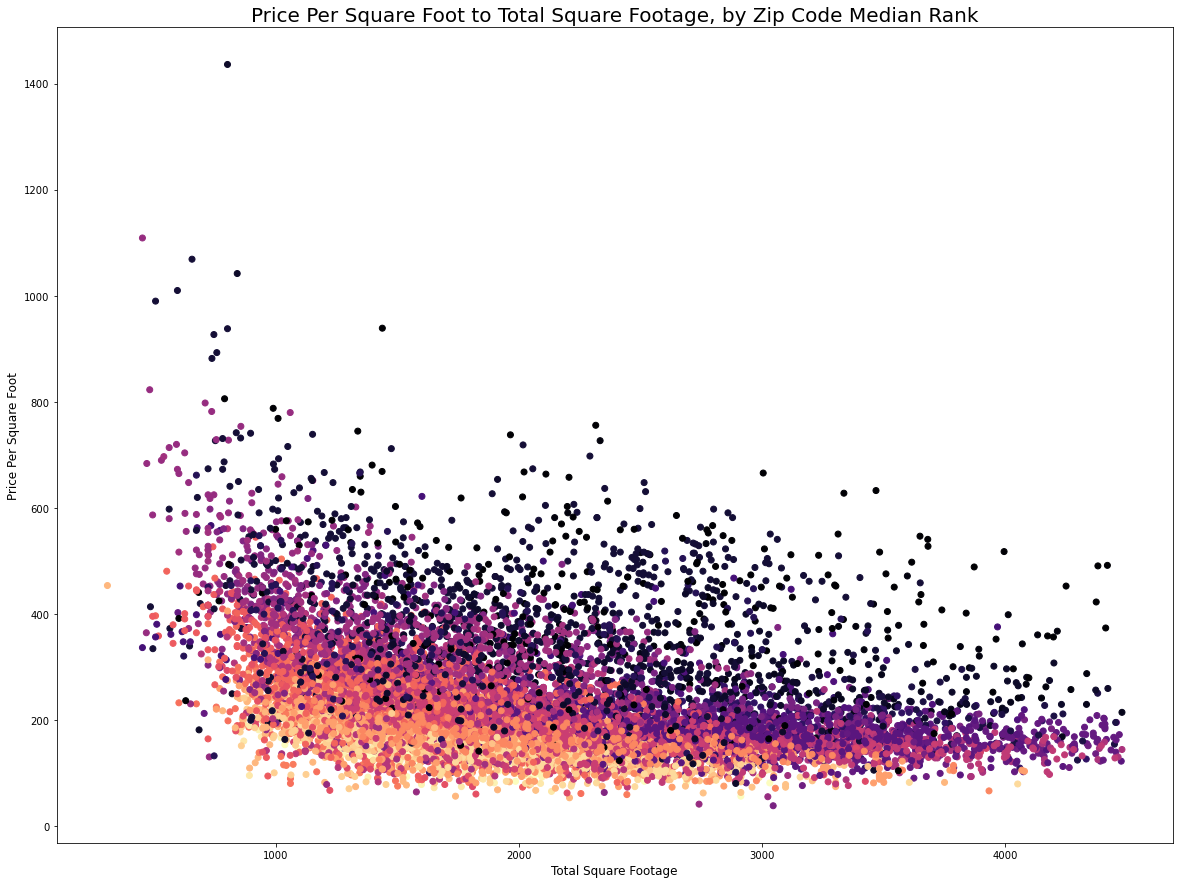

In [46]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['livingAreaSqFt'], df['pr_sqft'], c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Total Square Footage', fontsize=12)
ax.set_ylabel('Price Per Square Foot', fontsize=12)
ax.set_title('Price Per Square Foot to Total Square Footage, by Zip Code Median Rank', fontsize=20)

In [47]:
#dropping irrationally high pr/sqft
df.drop(df[df['pr_sqft']>1000].index, inplace=True)

Text(0.5, 1.0, 'Price per Total Square Footage, by Zip Code Median Rank')

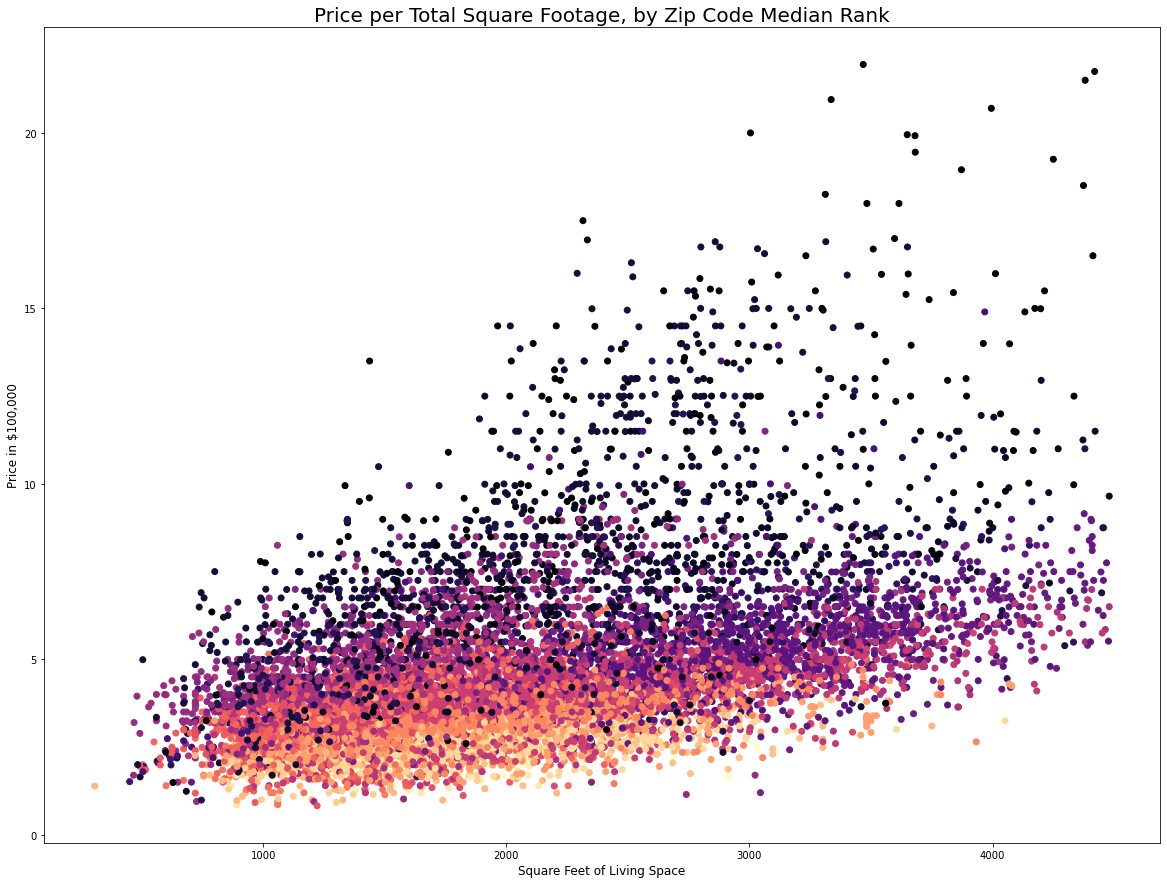

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['livingAreaSqFt'], df['latestPrice'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Footage, by Zip Code Median Rank', fontsize=20)

In [49]:
low_zips = df.loc[df['median_zip']<df['latestPrice'].mean()]
high_zips = df.loc[df['median_zip']>=df['latestPrice'].mean()]

Text(0.5, 1.0, 'Price per Total Square Footage, by Zip Code Median Rank \nFor Zip Medians under Mean')

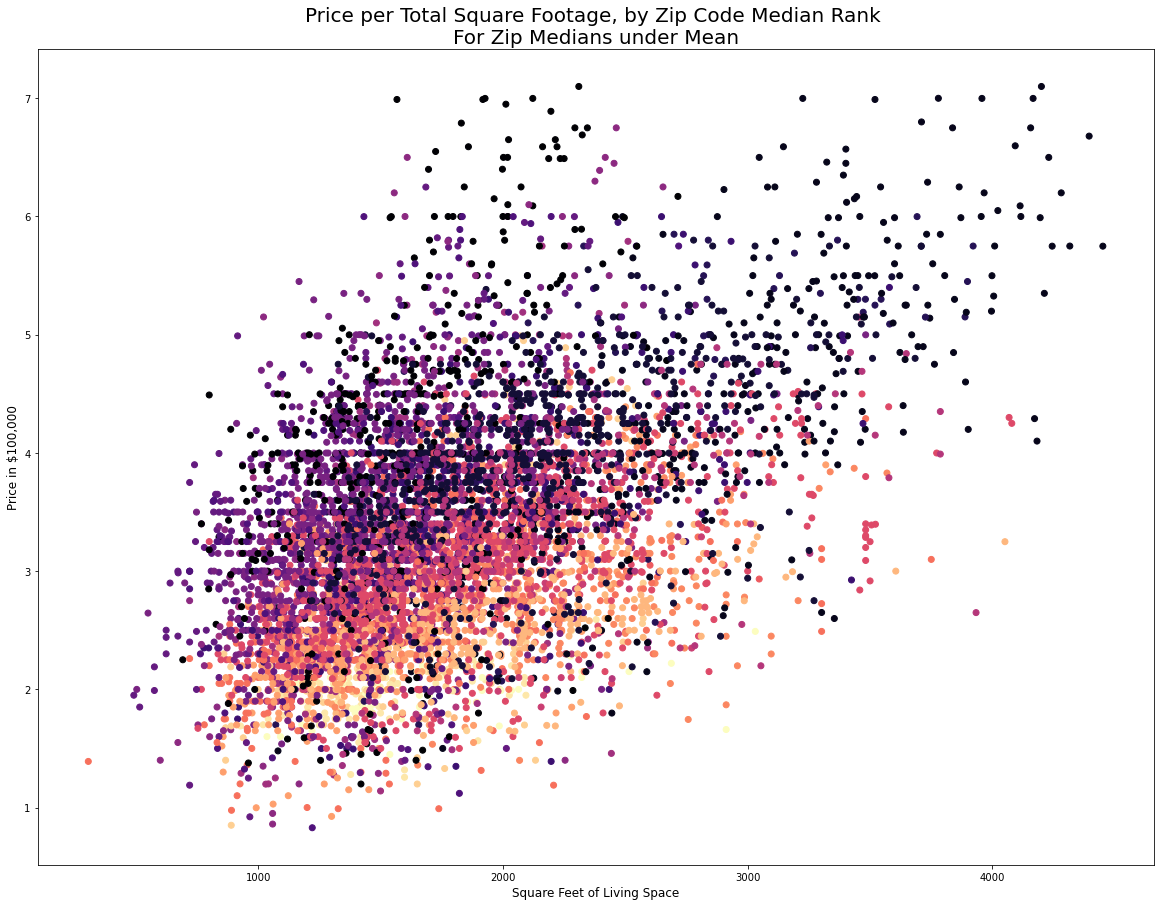

In [50]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(low_zips['livingAreaSqFt'], low_zips['latestPrice'] /100000, c=low_zips['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Footage, by Zip Code Median Rank \nFor Zip Medians under Mean', fontsize=20)

Text(0.5, 1.0, 'Price per Total Square Footage, by Zip Code Median Rank\nFor Zip Medians over Mean')

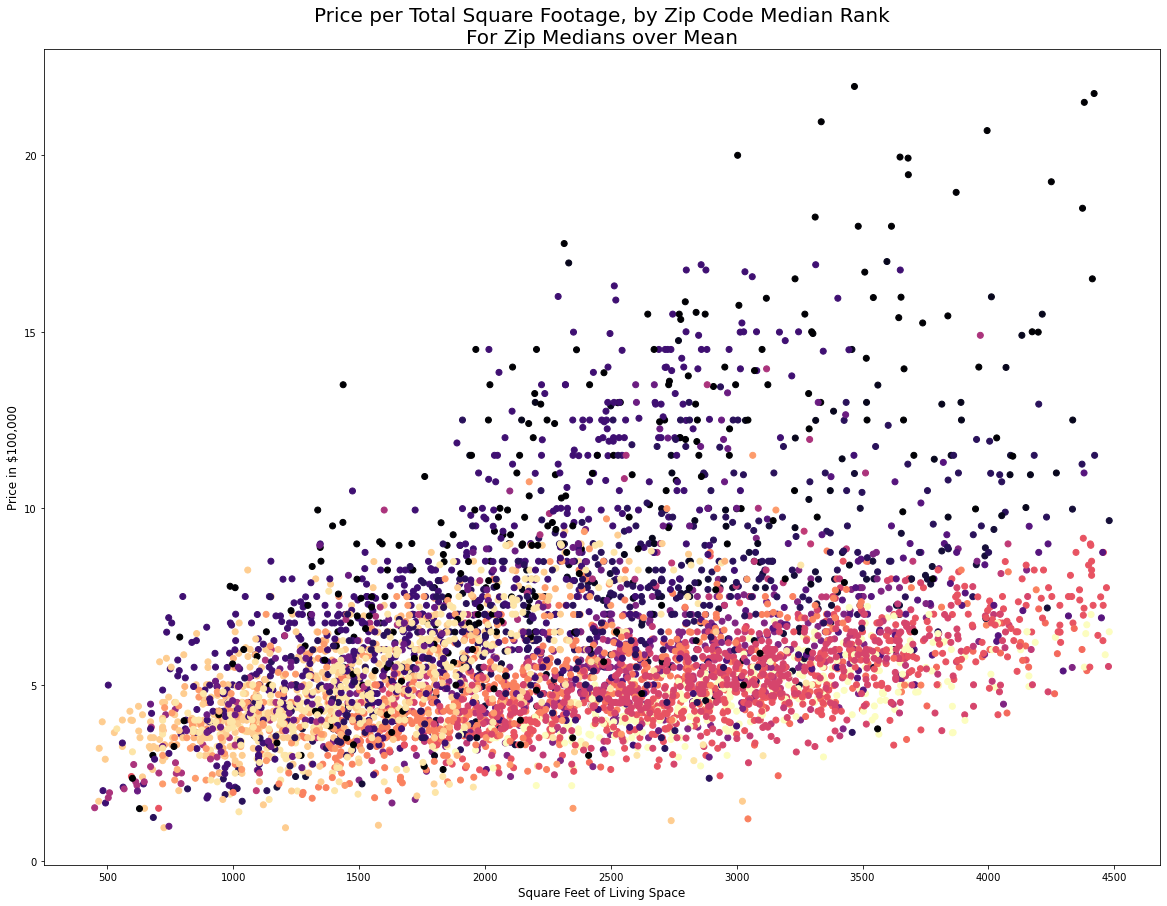

In [51]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(high_zips['livingAreaSqFt'], high_zips['latestPrice'] /100000, c=high_zips['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12)
ax.set_title('Price per Total Square Footage, by Zip Code Median Rank\nFor Zip Medians over Mean', fontsize=20)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

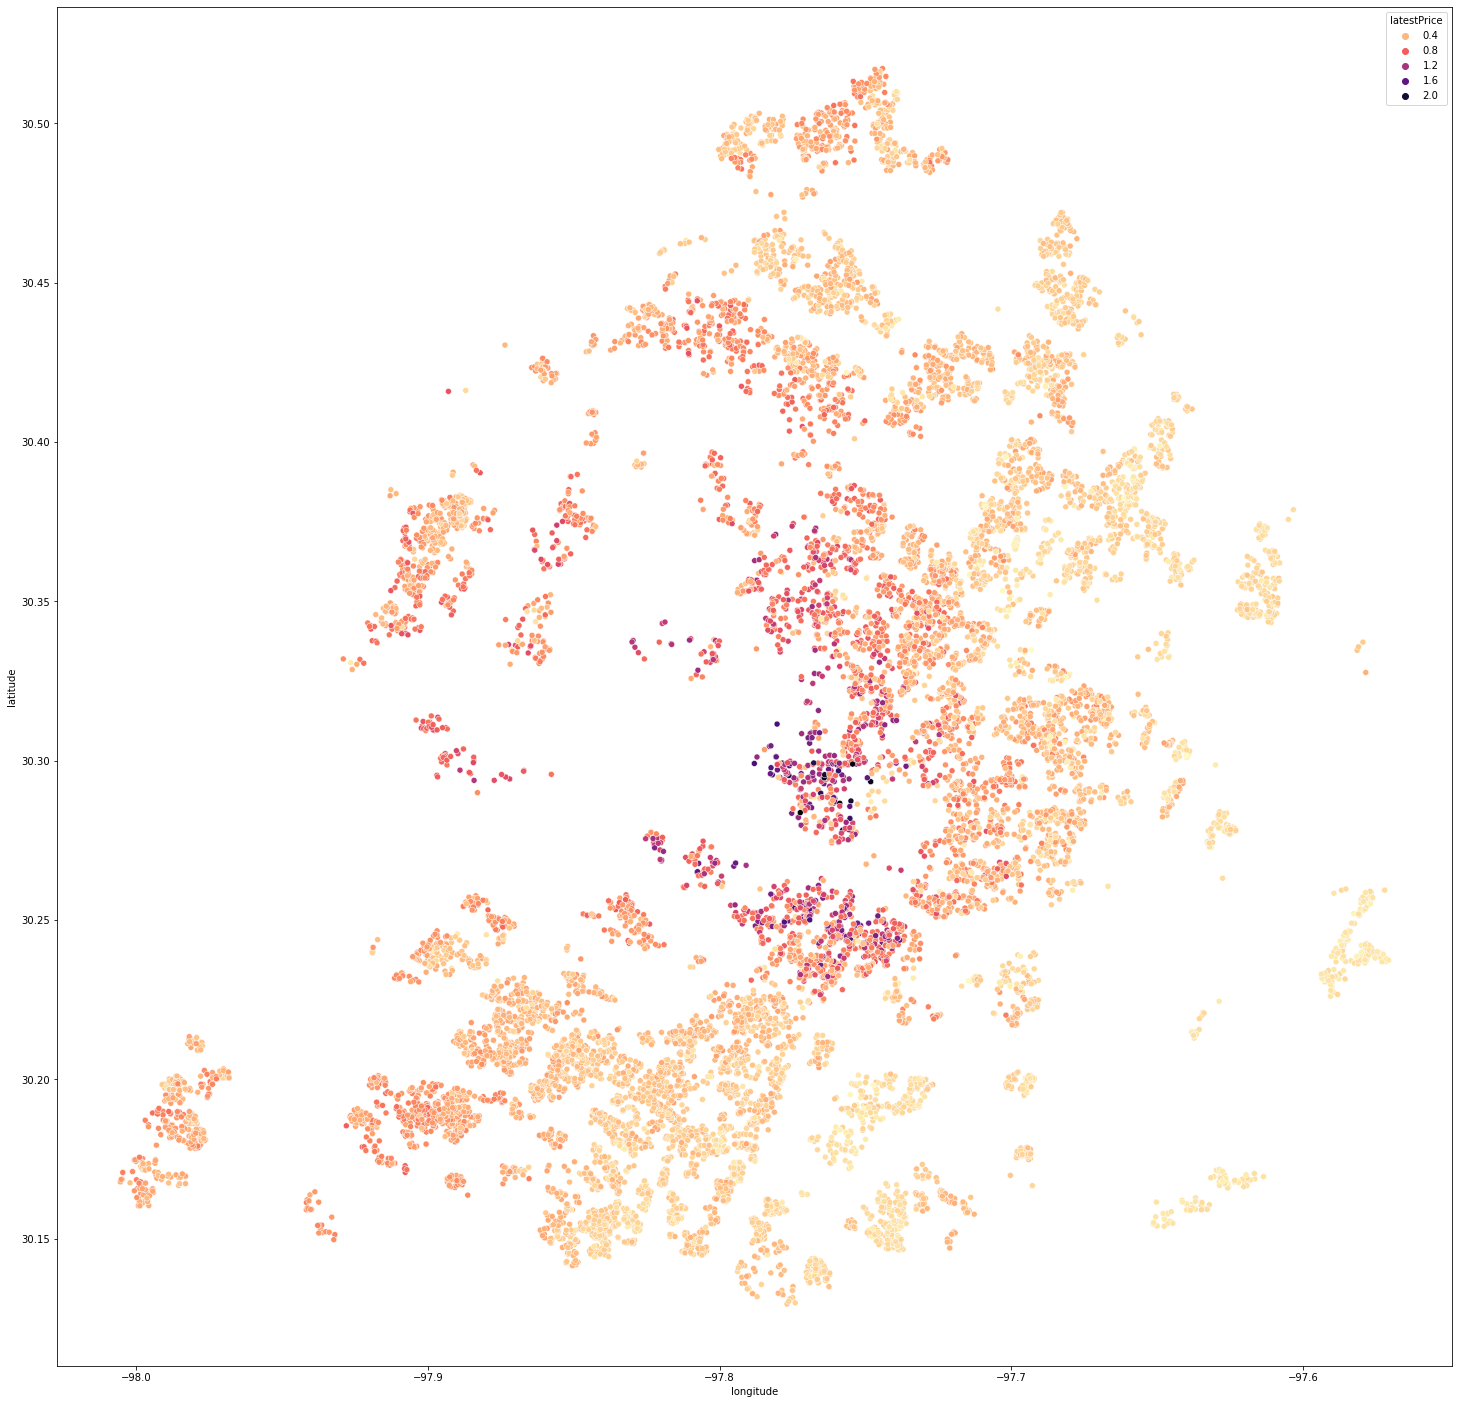

In [52]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="longitude", y="latitude", hue="latestPrice", palette="magma_r")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

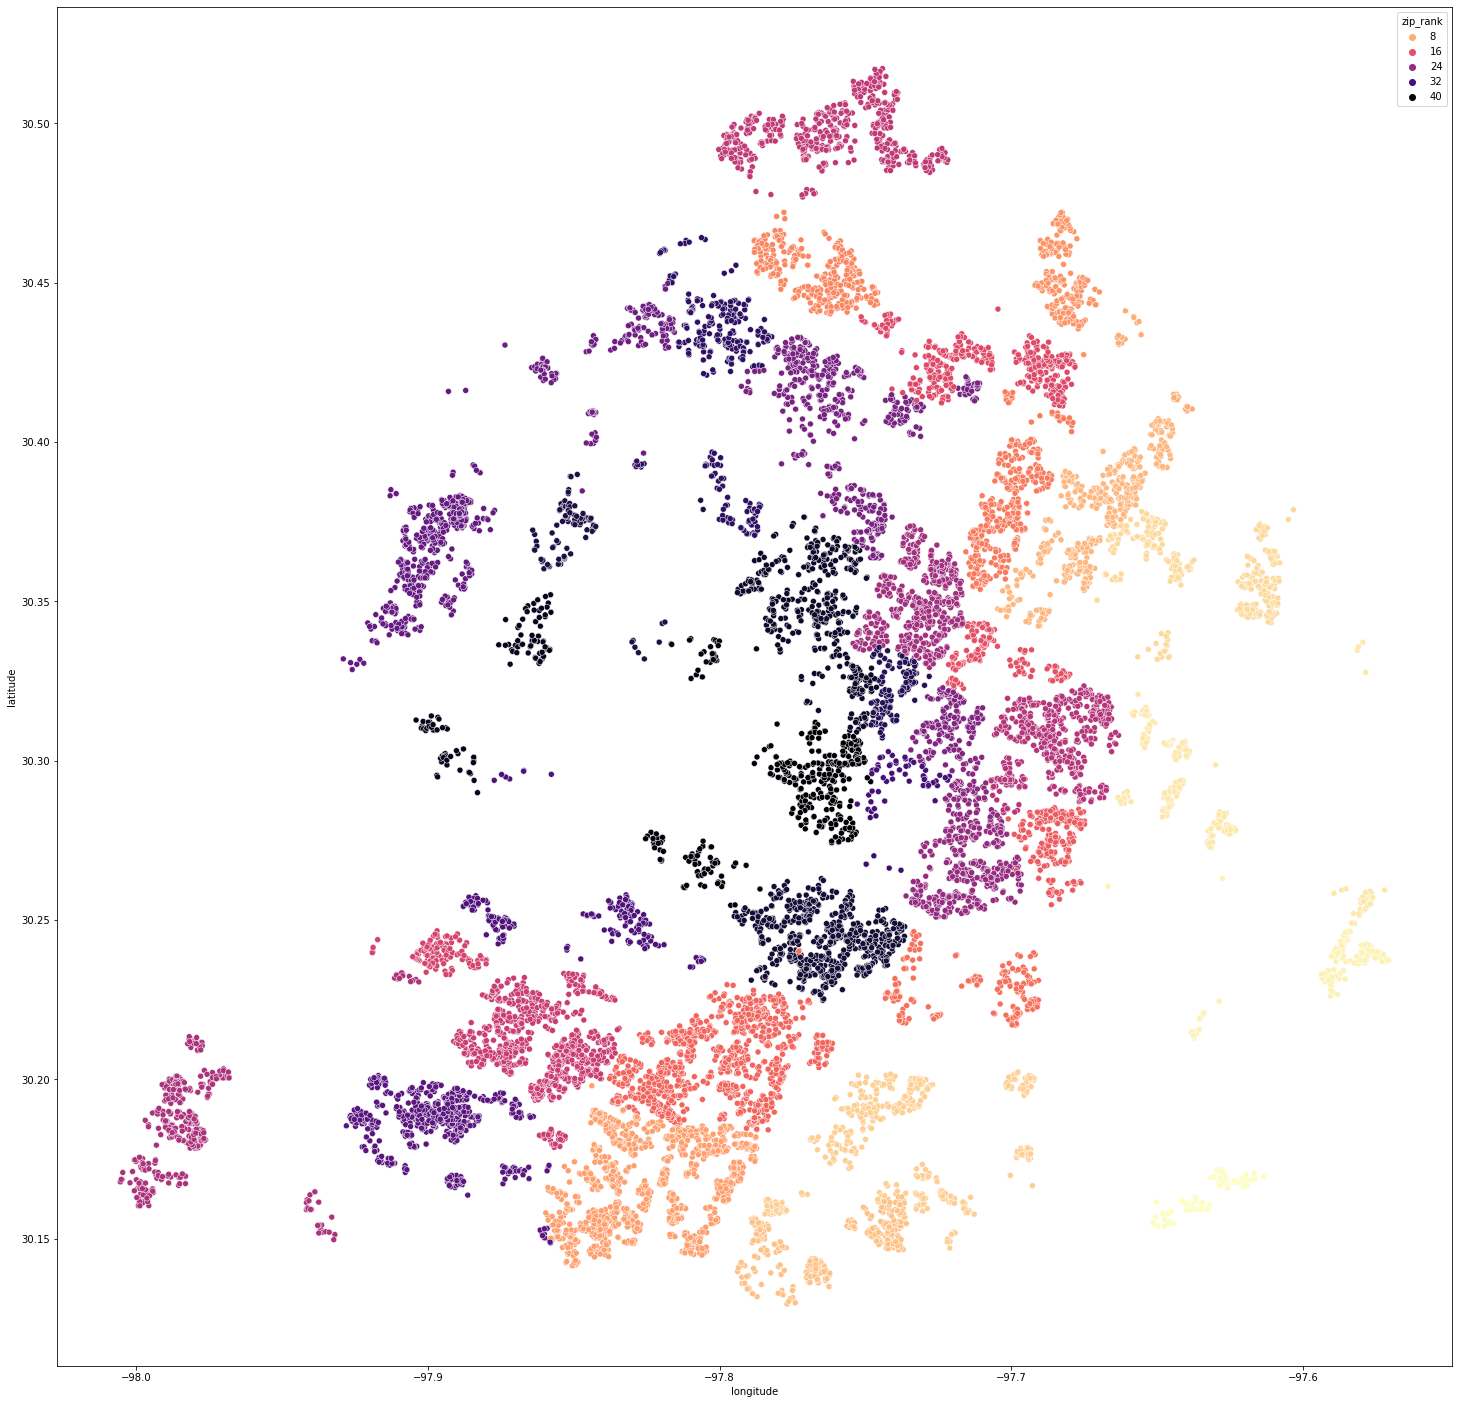

In [53]:
plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="longitude", y="latitude", hue="zip_rank", palette="magma_r")

# Check Data

In [54]:
df.isna().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [55]:
df.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

# Coverting bool to binary 0/1

In [56]:
convert_to_bool = ['numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures', 'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures', 'numOfWaterfrontFeatures', 'numOfWindowFeatures', 'numOfCommunityFeatures']

df_convert_to_bool = df[convert_to_bool]
df_convert_to_bool.describe()

numOfAccessibilityFeatures  numOfAppliances  numOfParkingFeatures  \
count                12933.000000     12933.000000          12933.000000   
mean                     0.012835         3.474986              1.691023   
std                      0.184429         1.847394              0.777692   
min                      0.000000         0.000000              0.000000   
25%                      0.000000         2.000000              1.000000   
50%                      0.000000         3.000000              2.000000   
75%                      0.000000         4.000000              2.000000   
max                      8.000000        10.000000              6.000000   

       numOfPatioAndPorchFeatures  numOfSecurityFeatures  \
count                12933.000000           12933.000000   
mean                     0.647336               0.461764   
std                      0.959209               0.815881   
min                      0.000000               0.000000   
25%                      0.000000               0.000000   
50%                      0.000000               0.000000   
75%                      1.000000               1.000000   
max                      8.000000               6.000000   

       numOfWaterfrontFeatures  numOfWindowFeatures  numOfCommunityFeatures  
count             12933.000000         12933.000000            12933.000000  
mean                  0.001083             0.203974                0.010825  
std                   0.035158             0.478740                0.109297  
min                   0.000000             0.000000                0.000000  
25%                   0.000000             0.000000                0.000000  
50%                   0.000000             0.000000                0.000000  
75%                   0.000000             0.000000                0.000000  
max                   2.000000             3.000000                3.000000

In [58]:
# Any element that has no features by the 50th percentile is getting converted to a binary 

# change all non-null values > 0 in those columns to 1
df.loc[df['numOfAccessibilityFeatures'] > 0, 'numOfAccessibilityFeatures'] = 1
df.loc[df['numOfPatioAndPorchFeatures'] > 0, 'numOfPatioAndPorchFeatures'] = 1
df.loc[df['numOfSecurityFeatures'] > 0, 'numOfSecurityFeatures'] = 1
df.loc[df['numOfWaterfrontFeatures'] > 0, 'numOfWaterfrontFeatures'] = 1
df.loc[df['numOfWindowFeatures'] > 0, 'numOfWindowFeatures'] = 1
df.loc[df['numOfCommunityFeatures'] > 0, 'numOfCommunityFeatures'] = 1

# now anything that is not a 1 becomes a 0
df.loc[df['numOfAccessibilityFeatures']!= 1, 'numOfAccessibilityFeatures'] = 0
df.loc[df['numOfPatioAndPorchFeatures'] != 1, 'numOfPatioAndPorchFeatures'] = 0
df.loc[df['numOfSecurityFeatures'] != 1, 'numOfSecurityFeatures'] = 0
df.loc[df['numOfWaterfrontFeatures'] != 1, 'numOfWaterfrontFeatures'] = 0
df.loc[df['numOfWindowFeatures'] != 1, 'numOfWindowFeatures'] = 0
df.loc[df['numOfCommunityFeatures'] != 1, 'numOfCommunityFeatures'] = 0

# rename to reflect binary
df.rename(columns={'numOfAccessibilityFeatures' : 'accessibility', 'numOfPatioAndPorchFeatures' : 'patioporch', 'numOfSecurityFeatures': 'security', 
                  'numOfWaterfrontFeatures': 'waterfront', 'numOfWindowFeatures' : 'windowfeatures', 'numOfCommunityFeatures' : 'community'}, inplace=True)

# convert original boolean columns to binary 0/1
boolean = ['hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for item in boolean:
    df[boolean] = df[boolean].astype(int)

KeyError: 'numOfAccessibilityFeatures'

In [59]:
# Final Check data
df.shape

(12933, 50)

In [60]:
df.head(5)

zpid    city          streetAddress  zipcode  \
0   111373431  austin   14424 Lake Victor Dr    78660   
1   120900430  austin     1104 Strickling Dr    78660   
2  2084491383  austin    1408 Fort Dessau Rd    78660   
3   120901374  austin     1025 Strickling Dr    78660   
4    60134862  austin  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  hasCooling  hasGarage  \
0             1.98             2               1           1          1   
1             1.98             2               1           1          1   
2             1.98             0               1           1          0   
3             1.98             2               1           1          1   
4             1.98             0               1           1          0   

   hasHeating  hasSpa  hasView       homeType  parkingSpaces  yearBuilt  \
0           1       0        0  Single Family              2       2012   
1           1       0        0  Single Family              2       2013   
2           1       0        0  Single Family              0       2018   
3           1       0        0  Single Family              2       2013   
4           1       0        0  Single Family              0       2002   

   latestPrice  numPriceChanges latest_saledate  latest_salemonth  \
0     305000.0                5      2019-09-02                 9   
1     295000.0                1      2020-10-13                10   
2     256125.0                1      2019-07-31                 7   
3     240000.0                4      2018-08-08                 8   
4     239900.0                3      2018-10-31                10   

   latest_saleyear                                latestPriceSource  \
0             2019  Coldwell Banker United, Realtors - South Austin   
1             2020                                   Agent Provided   
2             2019                                   Agent Provided   
3             2018                                   Agent Provided   
4             2018                                   Agent Provided   

   numOfPhotos  accessibility  numOfAppliances  numOfParkingFeatures  \
0           39              0                5                     2   
1           29              0                1                     2   
2            2              0                4                     1   
3            9              0                0                     2   
4           27              0                0                     1   

   patioporch  security  waterfront  windowfeatures  community  lotSizeSqFt  \
0           1         1           0               1          0       6011.0   
1           0         0           0               0          0       6185.0   
2           0         1           0               0          0       7840.0   
3           0         0           0               0          0       6098.0   
4           0         0           0               0          0       6708.0   

   livingAreaSqFt  numOfPrimarySchools  numOfElementarySchools  \
0          2601.0                    1                       0   
1          1768.0                    1                       0   
2          1478.0                    0                       2   
3          1678.0                    1                       0   
4          2132.0                    1                       0   

   numOfMiddleSchools  numOfHighSchools  avgSchoolDistance  avgSchoolRating  \
0                   1                 1           1.266667         2.

In [61]:
df.to_csv('autinHousingData_cleaned_citynamechanged.csv', index=False)